In [ ]:
#Classification Problem
"""Given: Student exam score data
Predict : prob of admission"""

In [2]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

import os  
path = os.getcwd() + '/ex2data1.txt'  
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])  
data.head()  

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


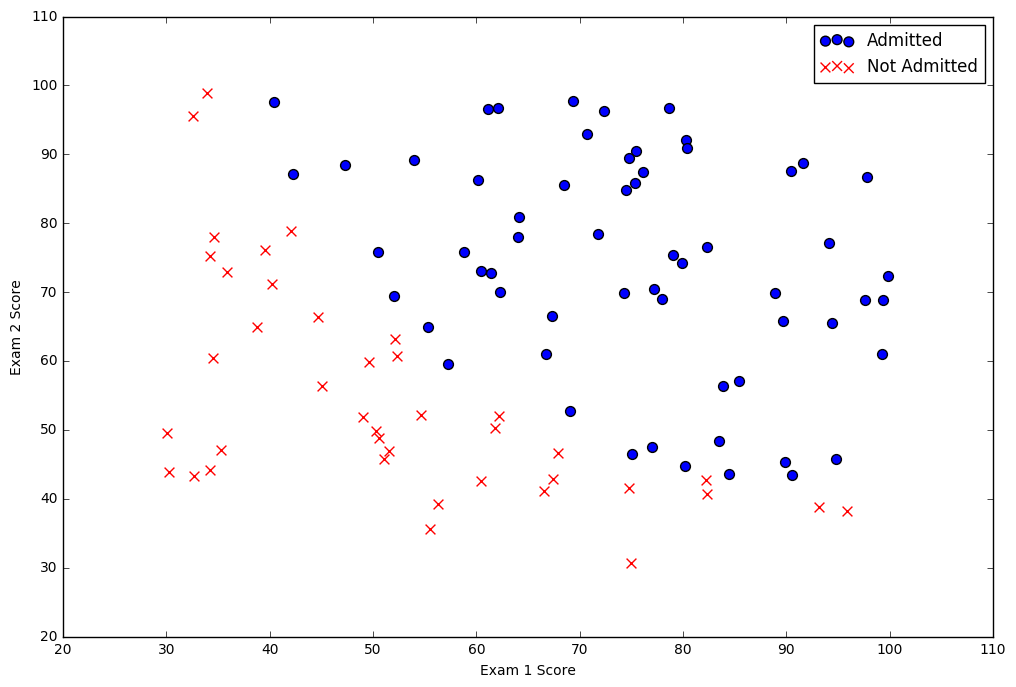

In [3]:
# 2 independent vars: Exam1 and Exam2
# both are continuous vars
# Prediction var is binary

positive = data[data['Admitted'].isin([1])]  
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')  
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')  
ax.legend()  
ax.set_xlabel('Exam 1 Score')  
ax.set_ylabel('Exam 2 Score')  

In [4]:
# activation function for the output of logistic regression
def sigmoid(z):  
    return 1 / (1 + np.exp(-z))

In [5]:
def cost(theta, X, y):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [6]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)  
y = np.array(y.values)  
theta = np.zeros(3)  

In [7]:
cost(theta, X, y)  

0.69314718055994529

In [8]:
#to find single gradient step
def gradient(theta, X, y):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad

In [9]:
#to optimise the parameters
import scipy.optimize as opt  
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))  
cost(result[0], X, y)  


0.20349770158947439

In [10]:
def predict(theta, X):  
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])  
predictions = predict(theta_min, X)  
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]  
accuracy = (sum(map(int, correct)) % len(correct))  
print 'accuracy = {0}%'.format(accuracy)  

accuracy = 89%
